# microsoftml Quickstart: Breast Cancer Prediction

## Summary
This quickstart is a simple example to show the use of the rx_fast_linear function to build a binary classifier model.

## 1. Load the breast cancer data 
We'll be using the breast cancer dataset that is built into scikit-learn. We will then use pandas and numpy to convert the data to a dataframe so that we can take a look at the data.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

bc = load_breast_cancer()

bc_df = pd.DataFrame(data = np.c_[bc['data'], bc['target']],
                     columns = bc['feature_names'].tolist() + ['target'])

bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## 2. Split the data into a train and test dataset
We will now split the data into 2 datasets. A train dataset to train the model, and a test dataset to gauge how good is  the model. We'll use 80% of the data for the train dataset and 20% for the test dataset.

In [2]:
from sklearn.model_selection import train_test_split

bc_train, bc_test = train_test_split(bc_df, test_size=0.2)

print("# of rows in training set = ",bc_train.size)
print("# of rows in test set = ",bc_test.size)

# of rows in training set =  14105
# of rows in test set =  3534


## 3. Train a binary classifier model
Now that we have the dataset to train with, we'll train a model using that data. We will be using the [rx_fast_linear](https://docs.microsoft.com/en-us/r-server/python-reference/microsoftml/rx-fast-linear) function from the [microsoftml](https://docs.microsoft.com/en-us/r-server/python-reference/microsoftml/microsoftml-package) package to train the model. 

The first parameter to the rx_fast_linear function specifies the target label followed by the features to train the model. This is known as the *formula* and has the format of "a ~ [b]" where "a" is the column name of the target and "[b]" is the list of feature columns to train with.

In this example, we create list of columns from the training dataset by taking all columns but dropping the target column (called "target" in this case).

In [3]:
from microsoftml import rx_fast_linear

features = bc_df.columns.drop(["target"])
model = rx_fast_linear("target ~ " + "+".join(features), data=bc_train)


Express Edition will continue to be enforced.
Automatically adding a MinMax normalization transform, use 'norm=Warn' or 'norm=No' to turn this behavior off.
Beginning processing data.
Rows Read: 455, Read Time: 0, Transform Time: 0
Beginning processing data.
Beginning processing data.
Rows Read: 455, Read Time: 0.001, Transform Time: 0
Beginning processing data.
Beginning processing data.
Rows Read: 455, Read Time: 0.001, Transform Time: 0
Beginning processing data.
Using 2 threads to train.
Automatically choosing a check frequency of 2.
Auto-tuning parameters: maxIterations = 3294.
Auto-tuning parameters: L2 = 2.670477E-05.
Auto-tuning parameters: L1Threshold (L1/L2) = 0.
Using best model from iteration 368.
Not training a calibrator because it is not needed.
Elapsed time: 00:00:06.1734881
Elapsed time: 00:00:00.4967690


## 4. Predict using the trained model
At this point we have a model that we have trained on the training data, using the rx_fast_linear binary classification algorithm. Let's now use that model to predict using the [rx_predict](https://docs.microsoft.com/en-us/r-server/python-reference/microsoftml/rx-predict), based on the test dataset. 

We will also take a look at the return result of rx_predict function. The *PredictedLabel* column indicates whether the data represents a cancerous sample or not. The *Probability* column indicates the confidence of the prediction for that particular row of data.

In [4]:
from microsoftml import rx_predict

prediction = rx_predict(model, data=bc_test)

prediction.head()

Beginning processing data.
Rows Read: 114, Read Time: 0.001, Transform Time: 0
Beginning processing data.
Elapsed time: 00:00:00.6729840
Finished writing 114 rows.
Writing completed.


,PredictedLabel,Score,Probability
0,True,6.273149,9.981173e-01
1,False,-17.446648,2.648605e-08
2,True,5.057464,9.936786e-01
3,True,1.958880,8.764117e-01
4,False,-2.303647,9.082136e-02


## 5. Evaluating the model
Let's now gauge the quality of the model we have. A standard metric to use is the AUC (Area Under the Curve) metric. Assuming no overfiiting of the model has taken place, the closer the value of the AUC is to 1, the better the quality of the model.

In [5]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(bc_test["target"], prediction["PredictedLabel"])

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.960526315789


We can also look at the ROC (Receiver Operating Characteristics) curve to visually see the performance of the model.

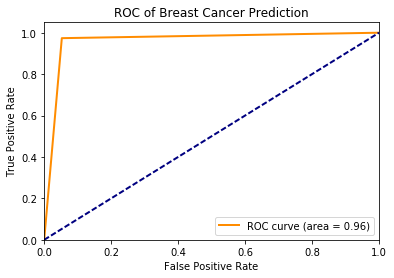

In [6]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.show()